Aquí tienes un modelo de red neuronal utilizando TensorFlow y Keras para clasificar dígitos manuscritos del conjunto de datos MNIST. Esta implementación incluirá:

1. **Carga y preprocesamiento del conjunto de datos MNIST.**
2. **Definición de una red neuronal simple.**
3. **Entrenamiento del modelo.**
4. **Evaluación y visualización de resultados.**

### **Código: Modelo de Red Neuronal para Clasificar Dígitos Manuscritos**

Epoch 1/10


c:\Users\juanito\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8361 - loss: 0.5533 - val_accuracy: 0.9547 - val_loss: 0.1534
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1307 - val_accuracy: 0.9682 - val_loss: 0.1079
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9747 - loss: 0.0852 - val_accuracy: 0.9712 - val_loss: 0.1011
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.0623 - val_accuracy: 0.9675 - val_loss: 0.1073
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0488 - val_accuracy: 0.9740 - val_loss: 0.0907
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9739 - val_loss: 0.0965
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9743 - val_loss: 0.0908
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0232 - val_accuracy: 0.9766 - val_

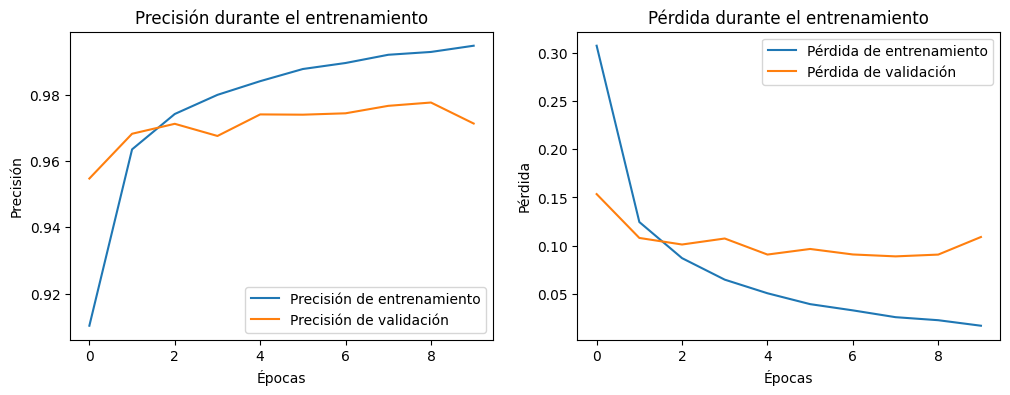

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


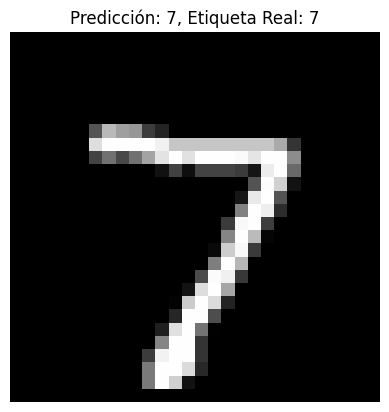

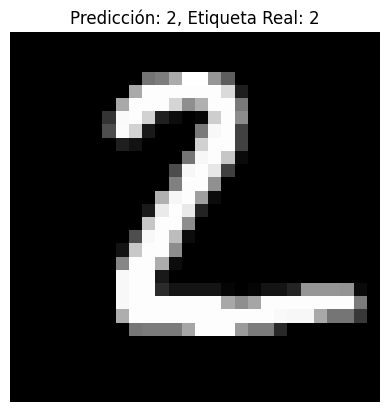

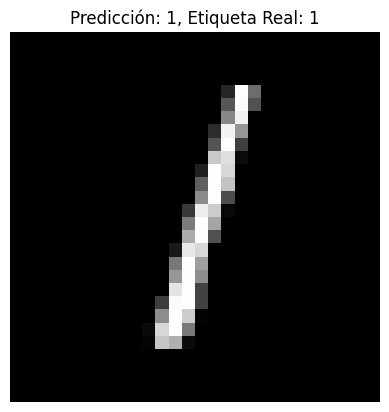

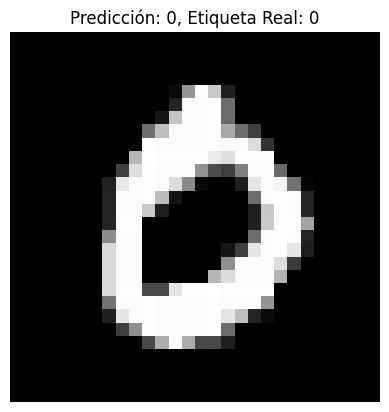

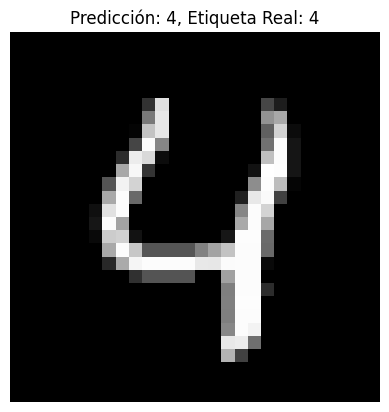

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Cargar y preprocesar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de las imágenes (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Definir la red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Aplanar imágenes de 28x28 píxeles
    Dense(128, activation='relu'),      # Capa oculta con 128 neuronas y ReLU
    Dense(64, activation='relu'),       # Capa oculta adicional con 64 neuronas
    Dense(10, activation='softmax')     # Capa de salida para 10 clases (dígitos 0-9)
])

# 3. Compilar el modelo
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 4. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 5. Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# 6. Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# 7. Mostrar predicciones de ejemplo
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicción: {predictions[i].argmax()}, Etiqueta Real: {y_test[i].argmax()}')
    plt.axis('off')
    plt.show()


### **Explicación del Código**

1. **Carga y Preprocesamiento:**
   - Se utiliza el conjunto de datos MNIST (70,000 imágenes de 28x28 píxeles).
   - Las imágenes se normalizan para que los valores estén entre 0 y 1, mejorando la convergencia durante el entrenamiento.
   - Las etiquetas se convierten en formato one-hot, que es necesario para la salida softmax.

2. **Definición de la Red Neuronal:**
   - La red tiene tres capas:
     - **Capa de entrada:** Aplana las imágenes de 28x28 a un vector de 784 características.
     - **Capas ocultas:** Dos capas densas (128 y 64 neuronas) con función de activación ReLU.
     - **Capa de salida:** Una capa con 10 neuronas (una por clase) y activación softmax.

3. **Entrenamiento:**
   - Se entrena durante 10 épocas con un tamaño de lote de 64.
   - Se usa `adam` como optimizador y `categorical_crossentropy` como función de pérdida.

4. **Evaluación:**
   - Se evalúa el modelo en el conjunto de prueba, mostrando la precisión alcanzada.

5. **Visualización:**
   - Se grafican las curvas de precisión y pérdida para analizar el rendimiento del modelo.
   - Se muestran ejemplos de predicciones, comparando los valores predichos con las etiquetas reales.

---

### **Resultados Esperados**

- **Precisión de Prueba:** Con esta arquitectura simple, se espera una precisión en el conjunto de prueba de aproximadamente **97-98%**.
- **Gráficas:** Las curvas de precisión y pérdida mostrarán cómo mejora el modelo durante el entrenamiento.
- **Predicciones Visuales:** Los ejemplos ilustrarán la capacidad del modelo para clasificar correctamente los dígitos manuscritos.